In [1]:
# Importazione delle librerie necessarie
# plotting e calcolo scientifico
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#machin learning

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import xgboost as xgb

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

import optuna

In [2]:
df = pd.read_csv('diabete_data.csv')

In [3]:
print("--- Prime 5 righe del dataset ---")
print(df.head())
print("\n--- Informazioni sul dataset ---")
print(df.info())

--- Prime 5 righe del dataset ---
   id  age  alcohol_consumption_per_week  physical_activity_minutes_per_week  \
0   0   31                             1                                  45   
1   1   50                             2                                  73   
2   2   32                             3                                 158   
3   3   54                             3                                  77   
4   4   54                             1                                  55   

   diet_score  sleep_hours_per_day  screen_time_hours_per_day   bmi  \
0         7.7                  6.8                        6.1  33.4   
1         5.7                  6.5                        5.8  23.8   
2         8.5                  7.4                        9.1  24.1   
3         4.6                  7.0                        9.2  26.6   
4         5.7                  6.2                        5.1  28.8   

   waist_to_hip_ratio  systolic_bp  ...  gender  ethnicity

In [4]:
object_df = df.select_dtypes(include=[object])
object_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   gender             700000 non-null  object
 1   ethnicity          700000 non-null  object
 2   education_level    700000 non-null  object
 3   income_level       700000 non-null  object
 4   smoking_status     700000 non-null  object
 5   employment_status  700000 non-null  object
dtypes: object(6)
memory usage: 32.0+ MB


In [6]:
object_df.nunique()

gender               3
ethnicity            5
education_level      4
income_level         5
smoking_status       3
employment_status    4
dtype: int64

In [7]:
unique_values = object_df.apply(lambda x: x.unique())
print(unique_values)

gender                                         [Female, Male, Other]
ethnicity                     [Hispanic, White, Asian, Black, Other]
education_level      [Highschool, Graduate, Postgraduate, No formal]
income_level         [Lower-Middle, Upper-Middle, Low, Middle, High]
smoking_status                              [Current, Never, Former]
employment_status           [Employed, Retired, Student, Unemployed]
dtype: object


In [3]:
gender = df['gender']

In [4]:
income_level_to_value = {'Lower-Middle' : 2, 'Upper-Middle':4, 'Low': 1, 'Middle':3, 'High':5}
df['income_level'] = df['income_level'].map(income_level_to_value)
df = pd.get_dummies(df, drop_first=True)

In [7]:
#Visualizza tutte le colonne solo all'interno di questo blocco
with pd.option_context('display.max_columns', None):
    display(df.head())

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,income_level,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,smoking_status_Former,smoking_status_Never,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,2,0,0,0,1.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,4,0,0,0,1.0,False,False,False,False,False,True,True,False,False,False,True,False,False,False
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108,2,0,0,0,0.0,True,False,False,True,False,False,True,False,False,False,True,True,False,False
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123,2,0,1,0,1.0,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124,4,0,1,0,1.0,True,False,False,False,False,True,True,False,False,False,True,True,False,False


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,700000.0,349999.500000,202072.738554,0.00,174999.75,349999.50,524999.25,699999.00
age,700000.0,50.359734,11.655520,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.0,2.072411,1.048189,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.0,80.230803,51.195071,1.00,49.00,71.00,96.00,747.00
diet_score,700000.0,5.963695,1.463336,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.0,7.002200,0.901907,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.0,6.012733,2.022707,0.60,4.60,6.00,7.40,16.50
bmi,700000.0,25.874684,2.860705,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.0,0.858766,0.037980,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,116.294193,11.010390,91.00,108.00,116.00,124.00,163.00


### controllo statistiche di base

min e max non problematici
deviazioni standard normali

physical_activity_minutes_per_week è un pò asimmetrica

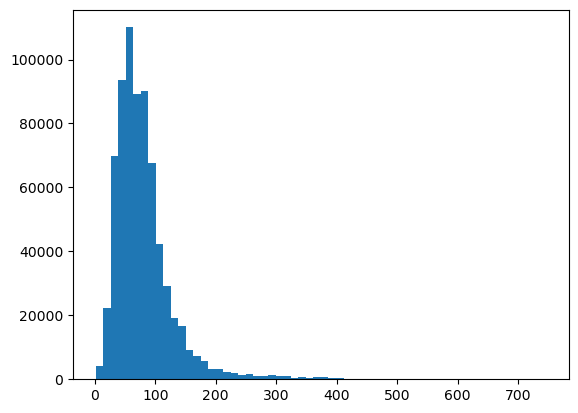

In [11]:
_ = plt.hist(df['physical_activity_minutes_per_week'], bins = 60)

## Verifico che il dataset sia bilanciato

In [5]:
ct = pd.crosstab(
    index=df['diagnosed_diabetes'],  # righe = diagnosticati o meno
    columns='count',                 # nome della colonna
    normalize=True                   # normalizza sul totale globale
)

# Rinomina la colonna per chiarezza
ct.columns = ['Proportion']
#ct.index = ['negativo','positivo']

# Mostra in percentuale
ct_percent = (ct * 100).round(2)

print(ct_percent)

                    Proportion
diagnosed_diabetes            
0.0                      37.67
1.0                      62.33


## Grafici interessanti

### pair plot fra tutte le feature numeriche

In [13]:
'''numeric = df.select_dtypes(include = ['int64', 'float64'])
g = sns.pairplot(numeric, diag_kind='kde', 
                 plot_kws={'alpha': 0.5, 's': 15}, 
                 diag_kws={'fill': True}, 
                 height=2)

g.figure.set_size_inches(12, 8)
g.figure.suptitle('Pairplot Matrix')
plt.tight_layout()
plt.show()'''

"numeric = df.select_dtypes(include = ['int64', 'float64'])\ng = sns.pairplot(numeric, diag_kind='kde', \n                 plot_kws={'alpha': 0.5, 's': 15}, \n                 diag_kws={'fill': True}, \n                 height=2)\n\ng.figure.set_size_inches(12, 8)\ng.figure.suptitle('Pairplot Matrix')\nplt.tight_layout()\nplt.show()"

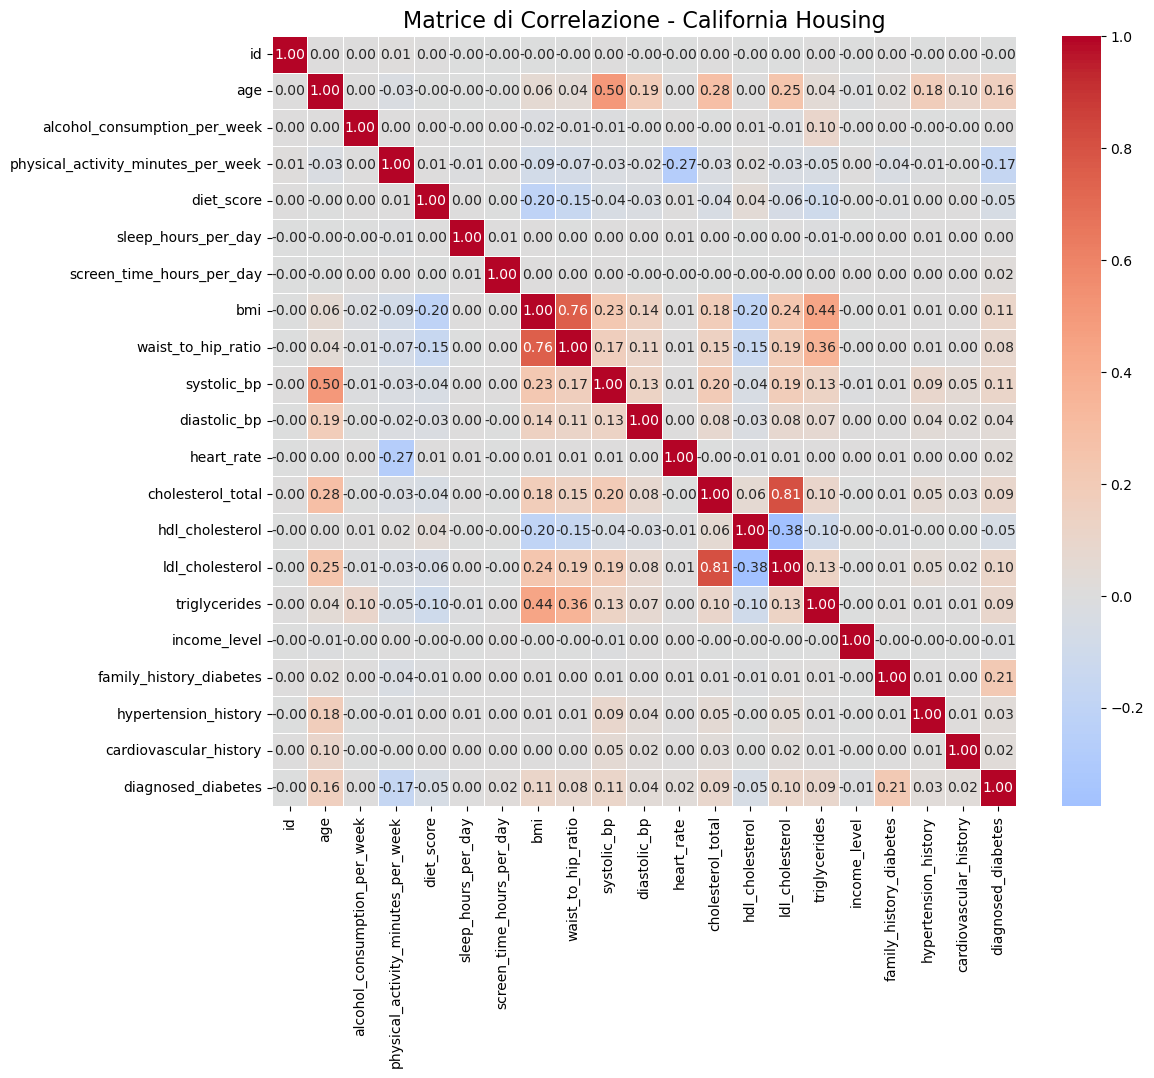

In [15]:
# 1. Calcolo la matrice di correlazione (coefficiente di Pearson)
# Nota: Se hai 'df_clean' dall'analisi precedente usa quello, altrimenti usa 'df'
corr_matrix = df.select_dtypes(include = ['int64', 'float64']).corr()

# 2. Setup della figura
plt.figure(figsize=(12, 10))

# 3. Creazione della Heatmap
# annot=True: scrive i numeri nelle celle
# cmap='coolwarm': Rosso=Positivo, Blu=Negativo, Bianco=Neutro
# fmt=".2f": arrotonda a 2 decimali per leggibilità
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")

plt.title('Matrice di Correlazione - California Housing', fontsize=16)
plt.show()

In [14]:
# Calcola la correlazione di tutte le colonne numeriche
correlations = df.corr()

# Seleziona solo la colonna di interesse e ordina decrescente
corr_target = correlations['diagnosed_diabetes'].sort_values(ascending=False)

# Trasforma in DataFrame per tabella ordinata
corr_table = pd.DataFrame(corr_target).reset_index()
corr_table.columns = ['Feature', 'Correlation_with_Diabetes']

print(corr_table)

                               Feature  Correlation_with_Diabetes
0                   diagnosed_diabetes                   1.000000
1              family_history_diabetes                   0.211064
2                  bmi_age_interaction                   0.184644
3                                  age                   0.161162
4                          systolic_bp                   0.107132
5                      sedentary_index                   0.105935
6                                  bmi                   0.105580
7                  non_hdl_cholesterol                   0.104893
8                      ldl_cholesterol                   0.102771
9                         tg_hdl_ratio                   0.098546
10                       triglycerides                   0.090635
11               castelli_risk_index_1                   0.090336
12              mean_arterial_pressure                   0.089832
13            metabolic_syndrome_score                   0.089258
14        

## Feature engeneiring

### 1. Indicatori di Insulino-Resistenza e Rischio Lipidico (Fondamentali)

Il profilo lipidico standard (Totale, HDL, LDL, Trigliceridi) è utile, ma nel diabete di tipo 2 la "dislipidemia diabetica" è specifica. Ecco cosa calcolare:

* **Rapporto Trigliceridi / HDL ($TG/HDL Ratio$)**
    * **Formula:** $\frac{\text{triglycerides}}{\text{hdl\_cholesterol}}$
    * **Significato medico:** È uno dei più potenti marker surrogati dell'**insulino-resistenza**. Un valore elevato (generalmente $> 2.5$ o $3.0$ se in mg/dL) è fortemente correlato a particelle LDL piccole e dense (più pericolose) e iperinsulinemia, anche prima che il diabete venga diagnosticato.
* **Colesterolo Non-HDL**
    * **Formula:** $\text{cholesterol\_total} - \text{hdl\_cholesterol}$
    * **Significato medico:** Le linee guida attuali per il diabete lo considerano un target terapeutico secondario cruciale. Rappresenta tutto il colesterolo "cattivo" (LDL + VLDL + IDL). È spesso un predittore di rischio cardiovascolare migliore dell'LDL da solo nei pazienti diabetici.
* **Rapporto Colesterolo Totale / HDL (Castelli Risk Index I)**
    * **Formula:** $\frac{\text{cholesterol\_total}}{\text{hdl\_cholesterol}}$
    * **Significato medico:** Valuta il rischio cardiovascolare globale. Nel diabetico, vogliamo mantenere questo rapporto il più basso possibile ($< 3.5$ idealmente).

### 2. Indicatori Emodinamici (Pressione Sanguigna)

L'ipertensione e il diabete viaggiano spesso insieme.

* **Pressione Differenziale (Pulse Pressure - PP)**
    * **Formula:** $\text{systolic\_bp} - \text{diastolic\_bp}$
    * **Significato medico:** Indica la rigidità arteriosa. Nel diabete, le arterie tendono a indurirsi prima. Una PP ampia ($> 60$ mmHg) è un fattore di rischio indipendente per eventi cardiaci e danni ai reni (nefropatia diabetica).
* **Pressione Arteriosa Media (MAP)**
    * **Formula:** $\text{diastolic\_bp} + \frac{1}{3}(\text{systolic\_bp} - \text{diastolic\_bp})$
    * **Significato medico:** Indica la pressione di perfusione degli organi vitali. È utile per valutare il carico cronico sul sistema vascolare.

### 3. Indicatori di Stile di Vita e Obesità Viscerale

Oltre al BMI (che non distingue tra muscolo e grasso) e al `waist_to_hip_ratio` (già presente e ottimo), possiamo combinare i fattori comportamentali.

* **Indice di Sedentarietà Relativa**
    * **Formula:** $\frac{\text{screen\_time\_hours\_per\_day} \times 7}{\text{physical\_activity\_minutes\_per\_week} / 60}$
    * *Nota:* Stiamo convertendo tutto in ore settimanali per avere un rapporto adimensionale o comparabile.
    * **Significato medico:** Il diabete è fortemente legato non solo alla mancanza di attività, ma al tempo trascorso seduti. Un alto rapporto indica un fenotipo ad alto rischio metabolico.
* **Interaction Term: BMI $\times$ Età**
    * **Significato medico:** L'impatto del BMI sul rischio di diabete cambia con l'età. Un BMI alto in giovane età è molto più predittivo per lo sviluppo precoce del diabete rispetto a un BMI alto in età avanzata. Creare questa variabile di interazione può aiutare i modelli di machine learning a catturare questa sfumatura.

### 4. Score di Sindrome Metabolica (Proxy)

Poiché hai quasi tutti i componenti della Sindrome Metabolica (tranne la glicemia a digiuno, ma hai l'outcome), puoi creare un punteggio di rischio (0-4) sommando le seguenti condizioni booleane (soglie basate su criteri ATP III / IDF):

1.  **Obesità addominale:** `waist_to_hip_ratio` $> 0.90$ (uomini) o $> 0.85$ (donne) [o usare BMI $> 30$ se WHR non è standardizzato].
2.  **Trigliceridi alti:** `triglycerides` $\ge 150$ mg/dL.
3.  **HDL basso:** `hdl_cholesterol` $< 40$ (uomini) o $< 50$ (donne).
4.  **Pressione alta:** `systolic_bp` $\ge 130$ oppure `diastolic_bp` $\ge 85$ (oppure `hypertension_history` == 1).

**Perché calcolarlo?** Più alto è questo punteggio, esponenzialmente più alto è il rischio di conversione in diabete franco o complicazioni.

### Riassunto per il tuo codice (Python/Pandas):

Se vuoi implementare subito i più impattanti, ecco come trasformerei il DataFrame:

1.  `TG_HDL_Ratio` (Trigliceridi / HDL) -> **Top Priority**
2.  `Non_HDL_Cholesterol` (Totale - HDL)
3.  `Pulse_Pressure` (Sistolica - Diastolica)
4.  `Metabolic_Syndrome_Score` (Somma dei fattori di rischio sopra citati)


In [6]:
def create_clinical_features(df):
    """
    Genera feature derivate per il rischio diabetico e cardiovascolare.
    """
    # Lavoriamo su una copia per non modificare il dataframe originale
    df_eng = df.copy()

    # ==============================================================================
    # 1. INDICATORI LIPIDICI E INSULINO-RESISTENZA
    # ==============================================================================
    
    # Rapporto Trigliceridi / HDL (Marker di insulino-resistenza)
    # Aggiungiamo una piccola epsilon per evitare divisioni per zero se HDL è 0 (raro ma possibile in dati sporchi)
    epsilon = 1e-6
    df_eng['tg_hdl_ratio'] = df_eng['triglycerides'] / (df_eng['hdl_cholesterol'] + epsilon)

    # Colesterolo Non-HDL (Colesterolo "Cattivo" Totale)
    df_eng['non_hdl_cholesterol'] = df_eng['cholesterol_total'] - df_eng['hdl_cholesterol']

    # Castelli Risk Index I (Totale / HDL)
    df_eng['castelli_risk_index_1'] = df_eng['cholesterol_total'] / (df_eng['hdl_cholesterol'] + epsilon)

    # ==============================================================================
    # 2. INDICATORI EMODINAMICI
    # ==============================================================================
    
    # Pulse Pressure (Pressione Differenziale)
    df_eng['pulse_pressure'] = df_eng['systolic_bp'] - df_eng['diastolic_bp']

    # Mean Arterial Pressure (MAP)
    df_eng['mean_arterial_pressure'] = df_eng['diastolic_bp'] + (df_eng['pulse_pressure'] / 3)

    # ==============================================================================
    # 3. STILE DI VITA E INTERAZIONI
    # ==============================================================================

    # Indice di Sedentarietà Relativa
    # Convertiamo minuti attività fisica settimanale in ore: (min / 60)
    # Evitiamo divisione per zero aggiungendo epsilon al denominatore
    activity_hours_per_week = df_eng['physical_activity_minutes_per_week'] / 60
    screen_time_per_week = df_eng['screen_time_hours_per_day'] * 7
    
    df_eng['sedentary_index'] = screen_time_per_week / (activity_hours_per_week + epsilon)

    # Interaction Term: BMI x Age
    df_eng['bmi_age_interaction'] = df_eng['bmi'] * df_eng['age']

    # ==============================================================================
    # 4. SCORE SINDROME METABOLICA (CON LOGICA DI GENERE)
    # ==============================================================================
    
    # Standardizzazione del genere per uniformità (assumiamo valori 'Male', 'Female', 'Other')
    # Adatta queste stringhe se il tuo dataset usa 'M', 'F', ecc.
    is_male = gender == 'Male'
    is_female = gender == 'Female'
    # 'Other' è implicito dove non è né Male né Female
    
    # --- A. Obesità Addominale (Waist-to-Hip Ratio) ---
    # Soglie: Uomo > 0.90, Donna > 0.85, Other = (0.90+0.85)/2 = 0.875
    whr_threshold = np.select(
        [is_male, is_female], 
        [0.90, 0.85], 
        default=0.875
    )
    df_eng['bool_abdominal_obesity'] = (df_eng['waist_to_hip_ratio'] > whr_threshold).astype(int)

    # --- B. Trigliceridi Alti ---
    # Soglia: >= 150 mg/dL (Indipendente dal sesso)
    df_eng['bool_high_triglycerides'] = (df_eng['triglycerides'] >= 150).astype(int)

    # --- C. HDL Basso ---
    # Soglie: Uomo < 40, Donna < 50, Other = 45
    hdl_threshold = np.select(
        [is_male, is_female], 
        [40, 50], 
        default=45
    )
    df_eng['bool_low_hdl'] = (df_eng['hdl_cholesterol'] < hdl_threshold).astype(int)

    # --- D. Pressione Alta ---
    # Soglie: Sys >= 130 OR Dia >= 85 OR Storia di Ipertensione
    df_eng['bool_high_bp'] = (
        (df_eng['systolic_bp'] >= 130) | 
        (df_eng['diastolic_bp'] >= 85) | 
        (df_eng['hypertension_history'] == 1)
    ).astype(int)

    # --- Calcolo Score Finale (0-4) ---
    df_eng['metabolic_syndrome_score'] = (
        df_eng['bool_abdominal_obesity'] + 
        df_eng['bool_high_triglycerides'] + 
        df_eng['bool_low_hdl'] + 
        df_eng['bool_high_bp']
    )

    return df_eng

In [7]:
df = create_clinical_features(df)

In [15]:
my_features = df.columns.values.tolist()
my_features.remove('diagnosed_diabetes')
X = df[my_features]
y = df['diagnosed_diabetes']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [18]:
def objective_raw(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'objective': 'binary:logistic',
        'n_jobs': -1,
        'random_state': 42,
        'verbosity': 0
    }
    
    model = xgb.XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='balanced_accuracy', n_jobs=-1)
    
    return scores.mean()

In [19]:
study_raw = optuna.create_study( 
                                direction="maximize", 
                                pruner = optuna.pruners.MedianPruner( n_startup_trials=5, n_warmup_steps=0, interval_steps=1))
                                                    
study_raw.optimize(objective_raw, n_trials=20, show_progress_bar=True)

print(f"\nBest CV Accuracy (Raw): {study_raw.best_value:.4f}")

# ------------------------------------------------------------------------------
# 5. CONFRONTO FINALE
# ------------------------------------------------------------------------------
# Training modello Raw finale
best_params_raw = study_raw.best_params
model = xgb.XGBClassifier(**best_params_raw )

model.fit(X_train, y_train)
y_pred_raw = model.predict(X_test)

[I 2025-12-07 15:41:55,453] A new study created in memory with name: no-name-1d225b54-d551-4905-a7da-054b1d17806a


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-12-07 15:43:38,082] Trial 0 finished with value: 0.6157695154701218 and parameters: {'n_estimators': 901, 'learning_rate': 0.8980662969568831, 'max_depth': 4, 'subsample': 0.6181470619404194, 'colsample_bytree': 0.7567309475211077, 'gamma': 0.3109866501403713, 'reg_alpha': 0.012386543019757654, 'reg_lambda': 6.0591896292118124e-05}. Best is trial 0 with value: 0.6157695154701218.
[I 2025-12-07 15:44:41,963] Trial 1 finished with value: 0.6285364623585884 and parameters: {'n_estimators': 927, 'learning_rate': 0.07192531409108058, 'max_depth': 5, 'subsample': 0.9753161133132016, 'colsample_bytree': 0.9543694372321204, 'gamma': 2.914913628507296, 'reg_alpha': 5.6468480573407425e-08, 'reg_lambda': 0.11137466705434264}. Best is trial 1 with value: 0.6285364623585884.
[I 2025-12-07 15:45:11,126] Trial 2 finished with value: 0.6195695134338793 and parameters: {'n_estimators': 412, 'learning_rate': 0.036142744797688975, 'max_depth': 4, 'subsample': 0.606879641677761, 'colsample_bytree'

In [20]:
# --- 5. Risultati ---
print("\n--- Tuning Completato ---")
print(f"Migliori Parametri Trovati: {best_params_raw}")


target_names = ['survived', 'not survived']

print("\n--- Report Finale (Test Set) ---")
print(f"Accuratezza Reale: {accuracy_score(y_test, y_pred_raw):.4f}")
print(classification_report(y_test, y_pred_raw, target_names=target_names))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_raw))


--- Tuning Completato ---
Migliori Parametri Trovati: {'n_estimators': 821, 'learning_rate': 0.01948002064764834, 'max_depth': 10, 'subsample': 0.6758185732666755, 'colsample_bytree': 0.6083566878928524, 'gamma': 4.475929263498088, 'reg_alpha': 5.323304576136052, 'reg_lambda': 0.006212076902936453}

--- Report Finale (Test Set) ---
Accuratezza Reale: 0.6832
              precision    recall  f1-score   support

    survived       0.62      0.41      0.50     52629
not survived       0.71      0.84      0.77     87371

    accuracy                           0.68    140000
   macro avg       0.66      0.63      0.63    140000
weighted avg       0.67      0.68      0.67    140000


Confusion Matrix:
 [[21834 30795]
 [13561 73810]]


In [48]:
explicatory_features = [
    'physical_activity_minutes_per_week',
    'bmi_age_interaction',
    'age',
    'non_hdl_cholesterol',
    'ldl_cholesterol',
    'systolic_bp',
    'triglycerides',
    'bmi',
    'cholesterol_total',
    'tg_hdl_ratio',
    'waist_to_hip_ratio',
    'gender_Male',
 'gender_Other'
    
]

In [52]:
X_basic = df[explicatory_features]
y = df['diagnosed_diabetes']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_basic, y, train_size=0.8, random_state=42)

In [54]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# C valori range
C = np.logspace(-1, 3, 10)   # da 0.1 a 1000

model = LogisticRegressionCV(Cs=C, cv=5, max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 0.6486142857142857

Classification Report:
               precision    recall  f1-score   support

         0.0       0.59      0.22      0.32     52629
         1.0       0.66      0.90      0.76     87371

    accuracy                           0.65    140000
   macro avg       0.62      0.56      0.54    140000
weighted avg       0.63      0.65      0.60    140000


Confusion Matrix:
 [[11800 40829]
 [ 8365 79006]]


### 1d Logistic regression

In [10]:
my_nice_features = [
 ['age'],
 ['alcohol_consumption_per_week'],
[ 'physical_activity_minutes_per_week'],
[ 'diet_score'],
 ['sleep_hours_per_day'],
 ['screen_time_hours_per_day'],
 ['bmi'],
 ['waist_to_hip_ratio'],
 ['systolic_bp'],
 ['diastolic_bp'],
 ['heart_rate'],
 ['cholesterol_total'],
 ['hdl_cholesterol'],
 ['ldl_cholesterol'],
 ['triglycerides'],
 ['income_level'],
 ['family_history_diabetes'],
 ['hypertension_history'],
 ['cardiovascular_history'],
 ['gender_Male',
 'gender_Other'],
 ['ethnicity_Black',
 'ethnicity_Hispanic',
 'ethnicity_Other',
 'ethnicity_White'],
 ['education_level_Highschool',
 'education_level_No formal',
 'education_level_Postgraduate'],
 ['smoking_status_Former',
 'smoking_status_Never'],
 ['employment_status_Retired',
 'employment_status_Student',
 'employment_status_Unemployed'],
 ['tg_hdl_ratio'],
['non_hdl_cholesterol'],
['castelli_risk_index_1'],
['pulse_pressure'],
['mean_arterial_pressure'],
['sedentary_index'],
['bmi_age_interaction'],
['bool_abdominal_obesity'],
['bool_high_triglycerides'],
['bool_low_hdl'],
['bool_high_bp'],
['metabolic_syndrome_score']
 ]

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# Lista per salvare i risultati
results = []

# Target
target = 'diagnosed_diabetes'


for feat in my_nice_features:
    
    # Modello in 1 dimensione
    X = df[feat]          # uso solo una colonna
    y = df[target]
    
    # Pipeline: StandardScaler + LogisticRegression
    clf = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000))
    ])
    
    cv = StratifiedKFold(n_splits= 5, shuffle = True, random_state = 42)
    
    # Cross-validation (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv, scoring='balanced_accuracy')
    
    # Accuracy media
    mean_acc = scores.mean()
    
    # Salvo i risultati
    results.append({
        'feature': feat,
        'accuracy': mean_acc
    })

# Creo il dataframe dei risultati
results_df = pd.DataFrame(results)

# Ordino per accuratezza decrescente
results_df = results_df.sort_values('accuracy', ascending=False)

print(results_df)

                                              feature  accuracy
30                              [bmi_age_interaction]  0.532140
2                [physical_activity_minutes_per_week]  0.531188
0                                               [age]  0.521287
6                                               [bmi]  0.502715
25                              [non_hdl_cholesterol]  0.502184
13                                  [ldl_cholesterol]  0.501762
14                                    [triglycerides]  0.501442
8                                       [systolic_bp]  0.501008
28                           [mean_arterial_pressure]  0.500597
11                                [cholesterol_total]  0.500490
24                                     [tg_hdl_ratio]  0.500425
7                                [waist_to_hip_ratio]  0.500378
27                                   [pulse_pressure]  0.500019
1                      [alcohol_consumption_per_week]  0.500000
3                                       

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


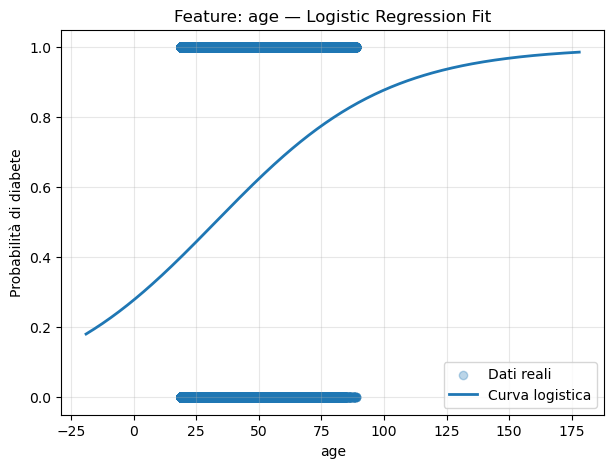

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


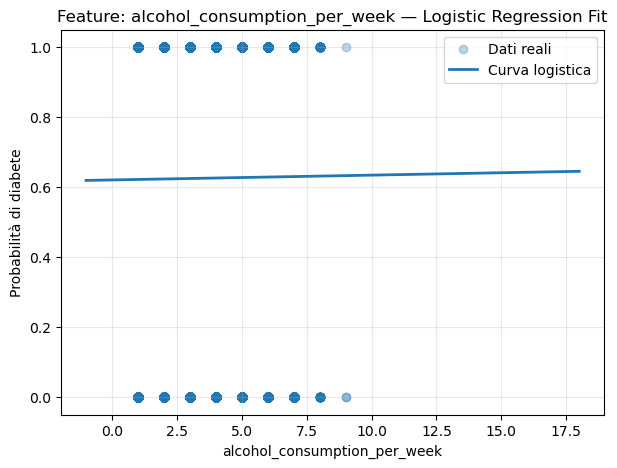

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


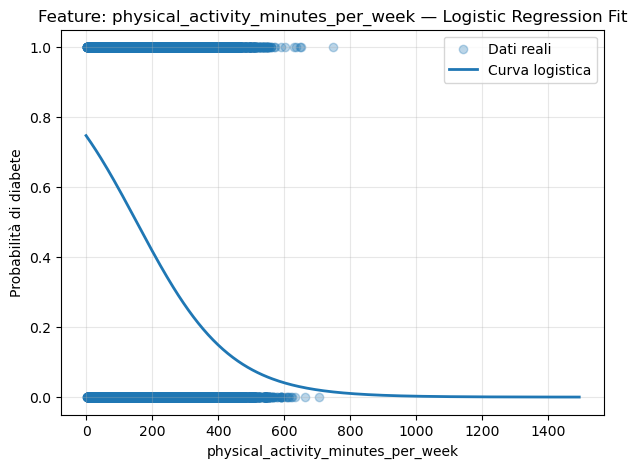

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


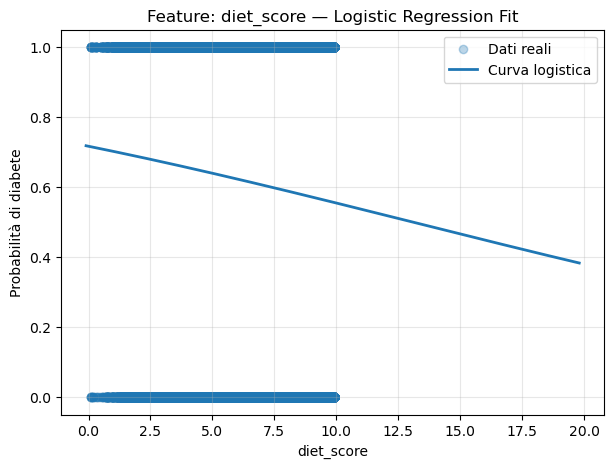

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


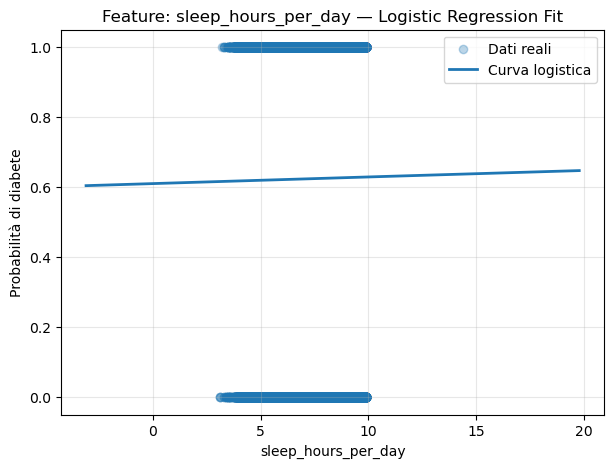

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


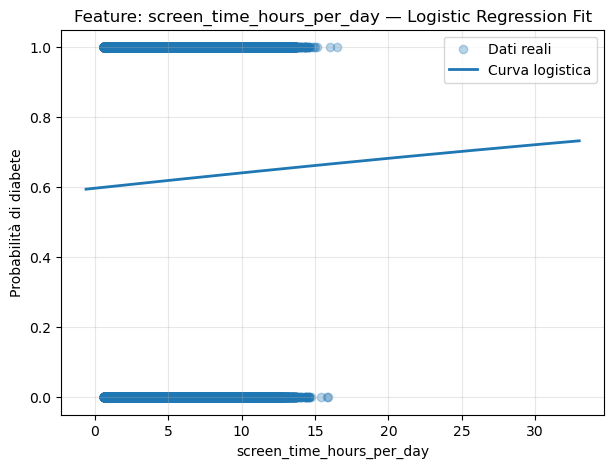

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


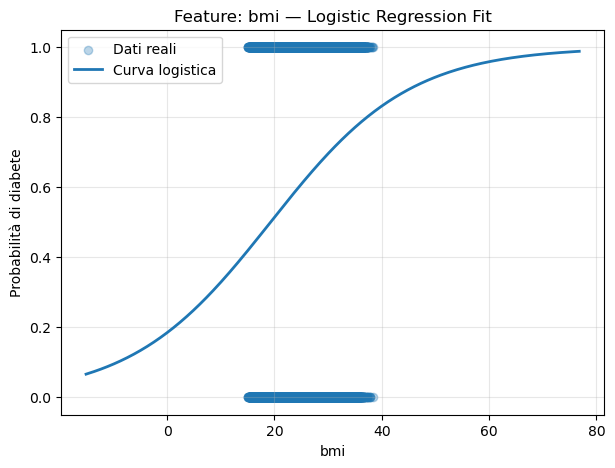

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


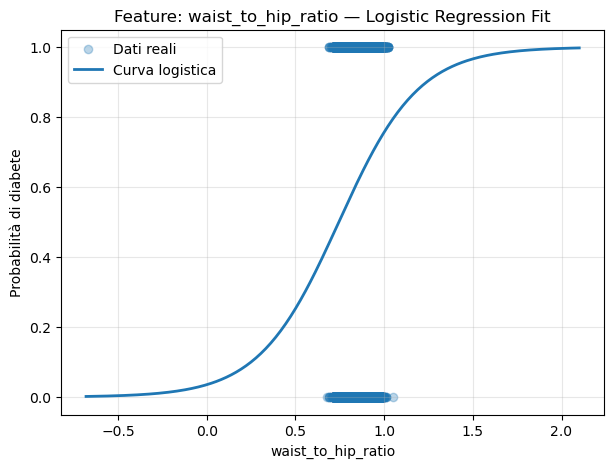

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


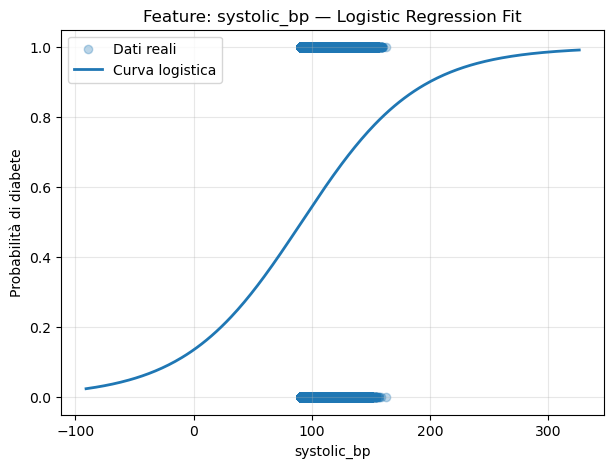

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


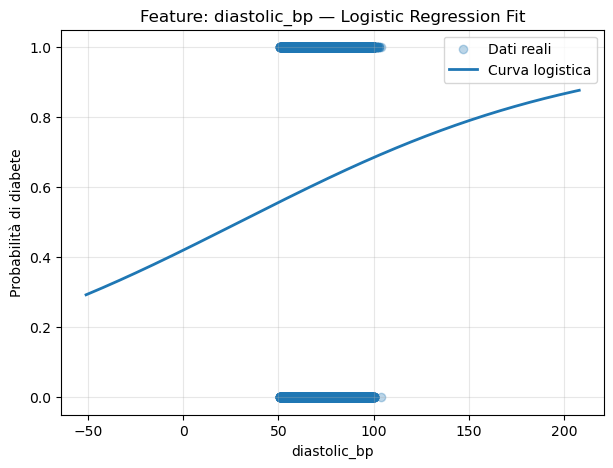

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


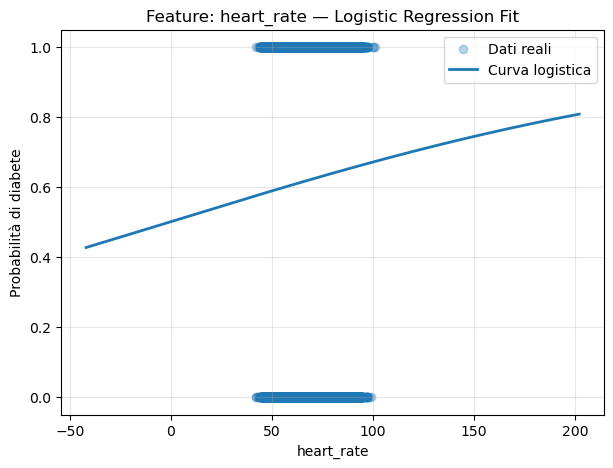

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


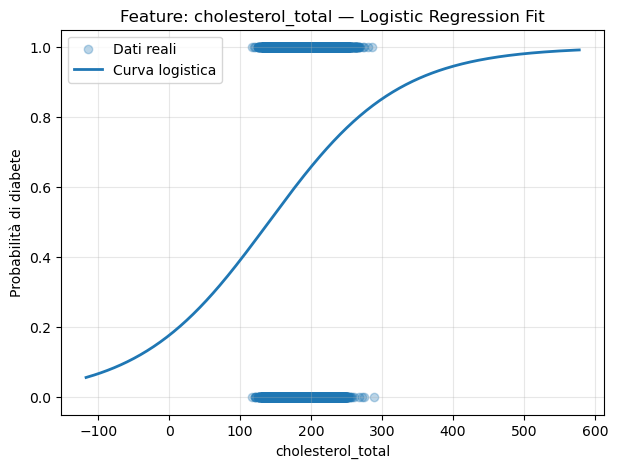

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


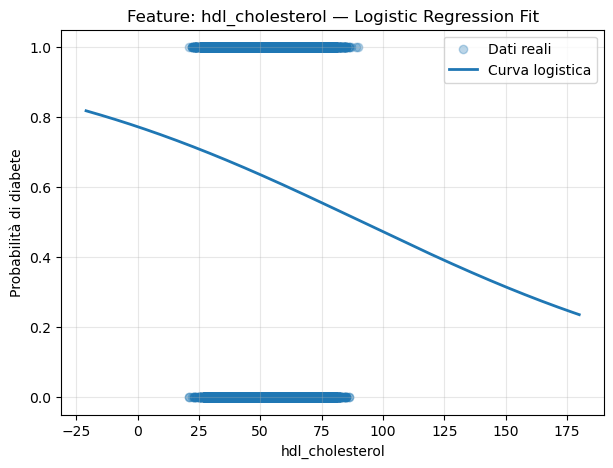

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


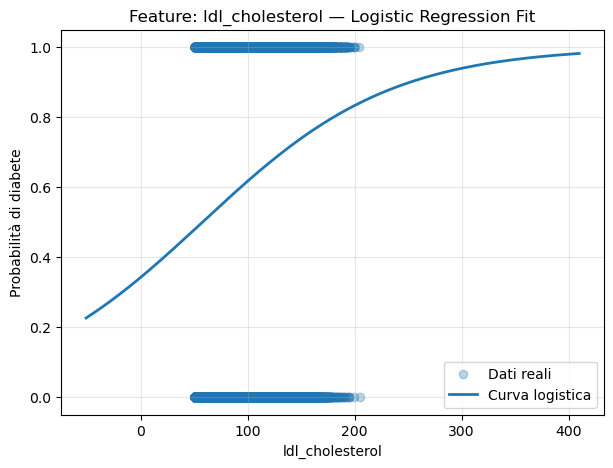

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


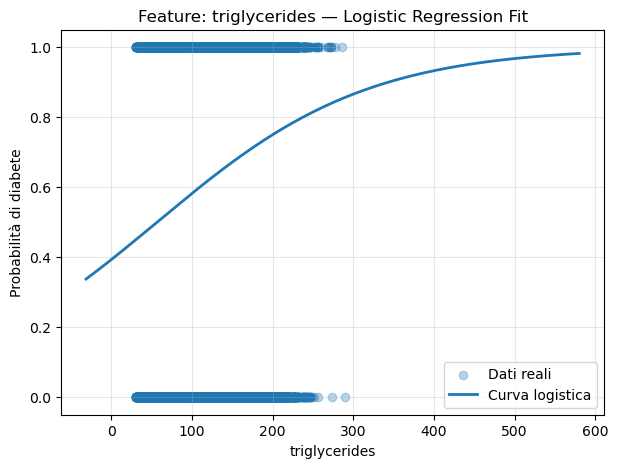

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


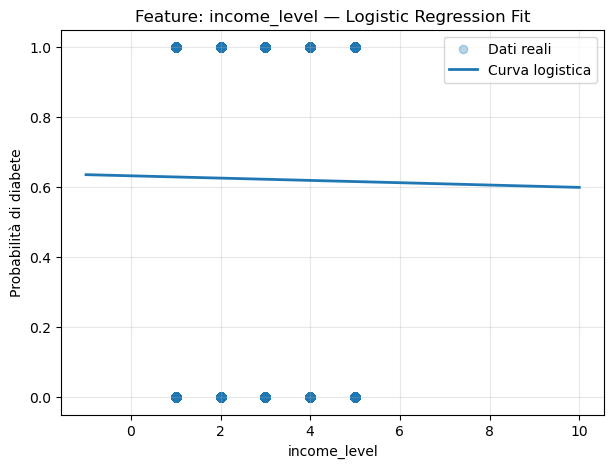

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


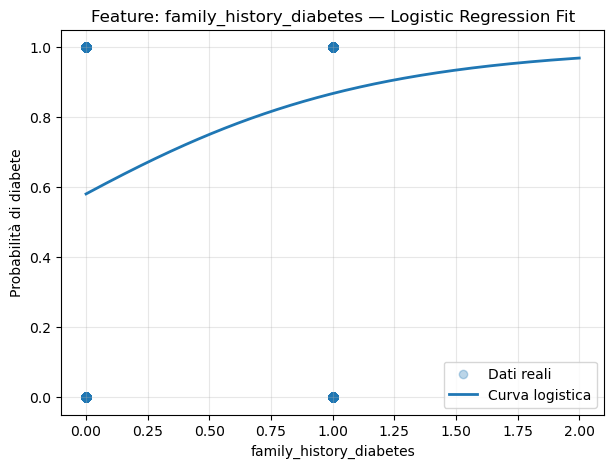

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


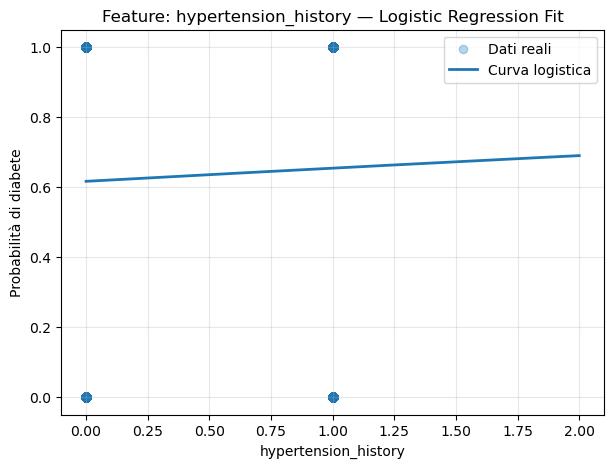

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


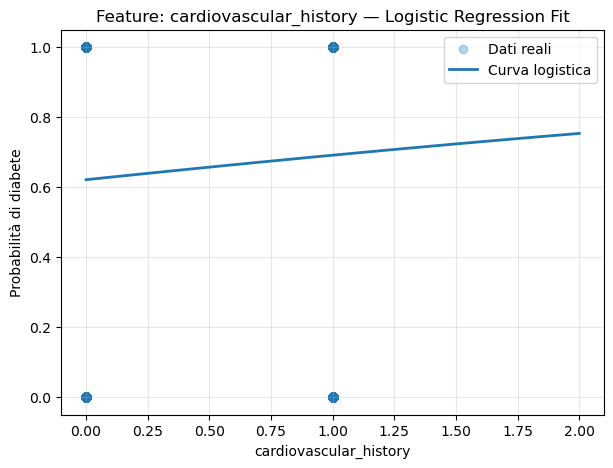

c:\Users\m-rog\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but StandardScaler is expecting 2 features as input.

In [42]:
# Lista per i risultati
results = []

# Target
target = 'diagnosed_diabetes'


for feat in my_nice_features:
    
    X = df[feat]
    y = df.loc[X.index, target]

    # Modello logistico + scaler
    clf = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=500))
    ])
    
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    mean_acc = scores.mean()

    # --- Fit finale per disegnare il grafico ---
    clf.fit(X, y)
    
    # Prevedo probabilità per curva logistica
    X_range = np.linspace(- X[feat].min(), X[feat].max() * 2, 300).reshape(-1, 1)
    y_prob = clf.predict_proba(X_range)[:, 1]

        # ======== GESTIONE GRAFICI ============
    if len(feat) == 1:
        feat = feat[0]

        # Genero range per la curva logistica
        X_range = np.linspace(- X[feat].min(), X[feat].max() * 2, 300).reshape(-1, 1)
        y_prob = clf.predict_proba(X_range)[:, 1]

        # Scatter + curva logistica
        plt.figure(figsize=(7, 5))
        plt.scatter(X[feat], y, alpha=0.3, label='Dati reali')
        plt.plot(X_range, y_prob, linewidth=2, label='Curva logistica')
        plt.title(f"Feature: {feat} — Logistic Regression Fit")
        plt.xlabel(feat)
        plt.ylabel("Probabilità di diabete")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.show()

    else:
        # Più di una feature → NO GRAFICO
        print(f"        (Grafico 2D impossibile con >1 dimensione)\n")
    # =================================

    # Salvo i risultati
    results.append({
        'feature': feat,
        'accuracy': mean_acc
    })

# DataFrame risultati
results_df = pd.DataFrame(results).sort_values('accuracy', ascending=False)
print(results_df)

In [31]:
df[['employment_status_Retired',
 'employment_status_Student',
 'employment_status_Unemployed']]

,employment_status_Retired,employment_status_Student,employment_status_Unemployed
0,False,False,False
1,False,False,False
2,True,False,False
3,False,False,False
4,True,False,False
...,...,...,...
699995,False,False,False
699996,False,False,False
699997,False,False,False
699998,True,False,False
